#  <font color=green>Credit Card Fraud Detection Project</font>


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download



## Library Imports 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


## Data Importing

In [32]:
data = pd.read_csv('creditcard_data.csv')

(94, 9)

##  PART 1 : EDA 

### Column and Row details 

In [3]:
# column names 
print(data.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284806 entries, 0 to 284805
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284806 non-null  float64
 1   V1      284806 non-null  float64
 2   V2      284806 non-null  float64
 3   V3      284806 non-null  float64
 4   V4      284806 non-null  float64
 5   V5      284806 non-null  float64
 6   V6      284806 non-null  float64
 7   V7      284806 non-null  float64
 8   V8      284806 non-null  float64
 9   V9      284806 non-null  float64
 10  V10     284806 non-null  float64
 11  V11     284806 non-null  float64
 12  V12     284806 non-null  float64
 13  V13     284806 non-null  float64
 14  V14     284806 non-null  float64
 15  V15     284806 non-null  float64
 16  V16     284806 non-null  float64
 17  V17     284806 non-null  float64
 18  V18     284806 non-null  float64
 19  V19     284806 non-null  float64
 20  V20     284806 non-null  float64
 21  V21     28

In [5]:
# data dimensions 
data.shape

(284806, 31)

In [6]:
# summary stats on columns 
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,284806.000000,284806.000000,...,2.848060e+05,284806.000000,284806.000000,2.848060e+05,284806.000000,284806.000000,2.848060e+05,2.848060e+05,284806.000000,284806.000000
mean,94813.585781,0.000002,6.661837e-07,-0.000002,0.000002,4.405007e-08,0.000002,-0.000006,0.000001,-0.000002,...,-9.166149e-07,-0.000002,-0.000001,-3.088756e-08,0.000002,0.000003,8.483873e-09,-4.792707e-08,88.349168,0.001727
std,47488.004530,1.958699,1.651311e+00,1.516257,1.415871,1.380249e+00,1.332273,1.237092,1.194355,1.098634,...,7.345251e-01,0.725702,0.624461,6.056481e-01,0.521278,0.482225,4.036332e-01,3.300838e-01,250.120432,0.041527
min,0.000000,-56.407510,-7.271573e+01,-48.325589,-5.683171,-1.137433e+02,-26.160506,-43.557242,-73.216718,-13.434066,...,-3.483038e+01,-10.933144,-44.807735,-2.836627e+00,-10.295397,-2.604551,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.250000,-0.920374,-5.985522e-01,-0.890368,-0.848642,-6.915995e-01,-0.768296,-0.554080,-0.208628,-0.643098,...,-2.283974e-01,-0.542351,-0.161846,-3.545895e-01,-0.317142,-0.326979,-7.083961e-02,-5.295995e-02,5.600000,0.000000
50%,84691.500000,0.018109,6.549621e-02,0.179846,-0.019845,-5.433621e-02,-0.274186,0.040097,0.022358,-0.051429,...,-2.945020e-02,0.006781,-0.011196,4.097671e-02,0.016596,-0.052134,1.342244e-03,1.124381e-02,22.000000,0.000000
75%,139320.000000,1.315645,8.037257e-01,1.027198,0.743348,6.119267e-01,0.398567,0.570426,0.327346,0.597140,...,1.863701e-01,0.528548,0.147641,4.395270e-01,0.350716,0.240955,9.104579e-02,7.828043e-02,77.160000,0.000000
max,172788.000000,2.454930,2.205773e+01,9.382558,16.875344,3.480167e+01,73.301626,120.589494,20.007208,15.594995,...,2.720284e+01,10.503090,22.528412,4.584549e+00,7.519589,3.517346,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# capture numeric columns and non numeric columns list 
num_vars = data.columns[data.dtypes != object]
cat_vars = data.columns[data.dtypes == object]

In [8]:
# print numeric columns 
print(num_vars)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [9]:
# print categorical columns 
print(cat_vars)

Index([], dtype='object')


In [10]:
# count of  nulls in columns 
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
# function to get unique count per column in a data frame 
def count_unique_values(df):
    
    total = df.count()
    temp = pd.DataFrame(total)
    temp.columns = ['Total']            # Count total number of non-null values
    
    uniques = []
    for col in df.columns:
        unique = df[col].nunique()    # Get unique values for each column
        uniques.append(unique)
    temp['Uniques'] = uniques
    
    return(np.transpose(temp))

In [12]:
# get count of unique values for dataframe 
count_unique_values(data)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Total,284806,284806,284806,284806,284806,284806,284806,284806,284806,284806,...,284806,284806,284806,284806,284806,284806,284806,284806,284806,284806
Uniques,124591,275652,275654,275656,275653,275656,275651,275650,275642,275655,...,275616,275643,275610,275644,275639,275646,275596,275557,32767,2


### Distributions and Correlations 


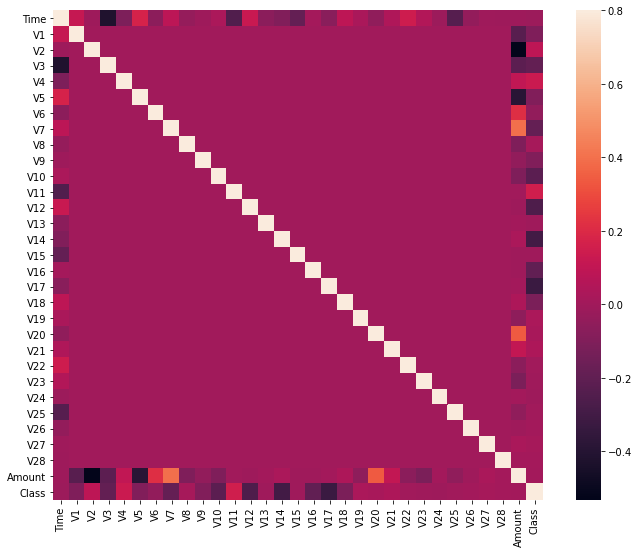

In [13]:

# correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (12, 9))

sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

 Plot shows mostly that the columns are not correlated 

In [14]:
# Histograms of each variable :  0.2 random sample of rows selected 
# ---------------------------------------------------------------------

# random_state helps assure that you always get the same output when you split the data
# this helps create reproducible results and it does not actually matter what the number is
# frac is percentage of the data that will be returned
data_part = data.sample(frac = 0.6, random_state = 1)
print(data_part.shape)

(170884, 31)


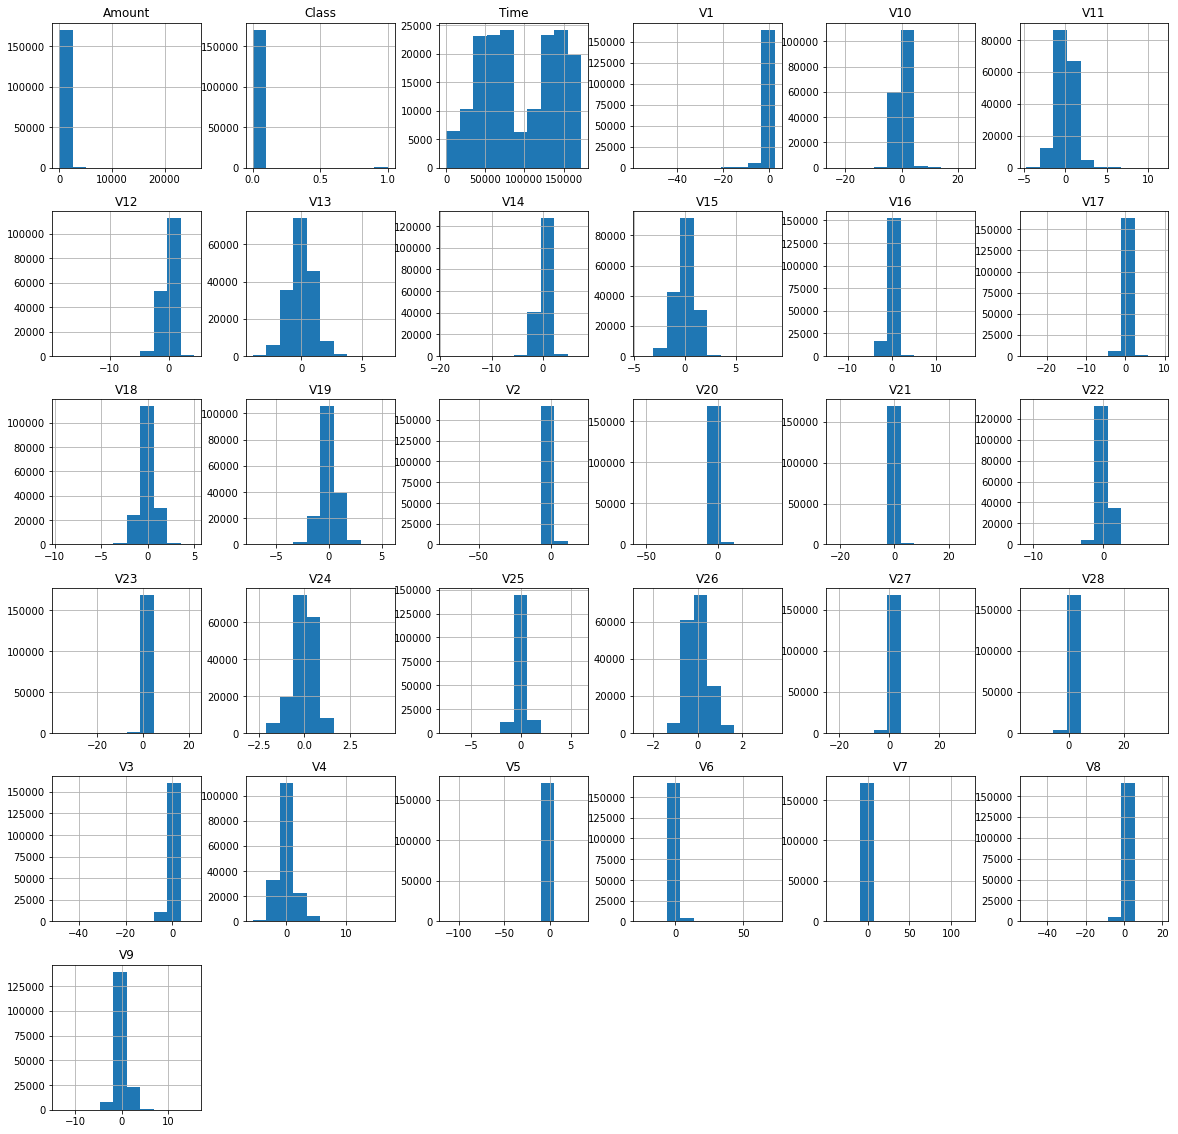

In [15]:
# plot the histogram of each parameter
data_part.hist(figsize = (20, 20))
plt.show()

You can see most of the V's are clustered around 0 with some or no outliers. Notice we have very few fraudulent cases over valid cases in our class histogram.

## Feature Explorations 

### Target Variable distribution studies 

In [16]:
temp = data["Class"].value_counts()
df = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df['Class'],y = df['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df['values']
)
data_fig = [trace]
layout = dict(title = 'Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data_fig, layout=layout)
iplot(fig, filename='class')

In [17]:
# determine the number of fraud vs not fraud cases
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlier_fraction = len(fraud) / float(len(valid))

# -----------------------
print('outlier_fraction : {}'.format(outlier_fraction))
print('Fraud Cases: {}'.format(len(fraud)))
print('Valid Cases: {}'.format(len(valid)))


outlier_fraction : 0.0017304810878113635
Fraud Cases: 492
Valid Cases: 284314


### Explorations in Time : Fraud Vs Non Fraud 

In [18]:
# Separate Time col for both the classes 
class_0 = data.loc[data['Class'] == 0]["Time"]
class_1 = data.loc[data['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')# 

**Observations** from the above plot : 

1. Fraud transactions show a more even spread than the Non Fraudulent transactions 

In [19]:
# Study Hourly Transaction Amount patterns for Fraud vs Non Fraud 
data['Hour'] = data['Time'].apply(lambda x: np.floor(x / 3600))

# Create a temp data frame With Hour , Class 
tmp = data.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df = pd.DataFrame(tmp)
df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df.head()


,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


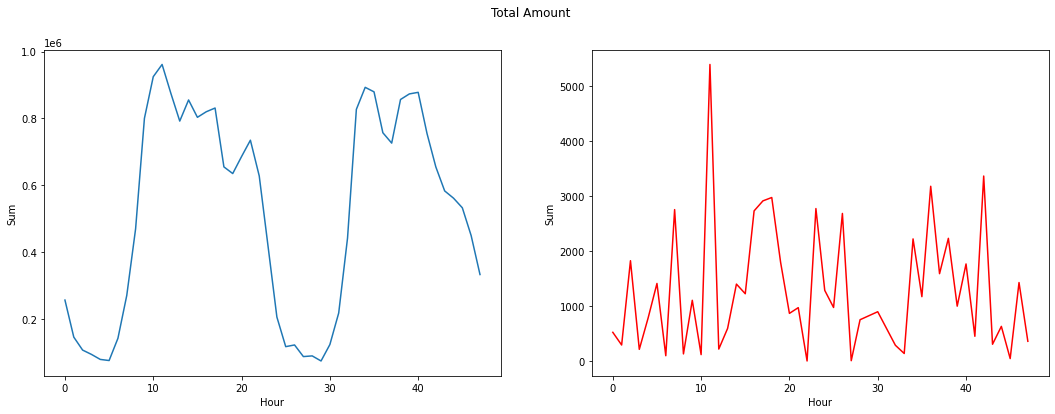

In [20]:
# Plot Total  Tran Amount Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show();

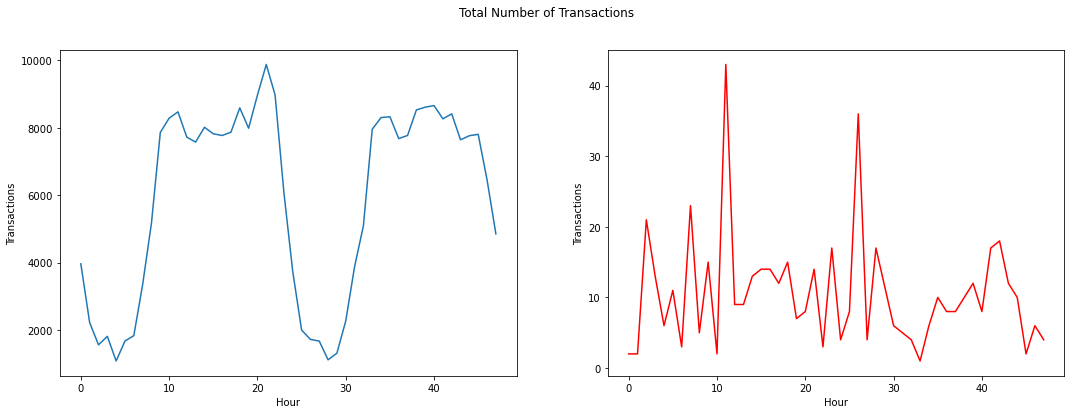

In [21]:
# Plot Count for Transactions  Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=df.loc[df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show();

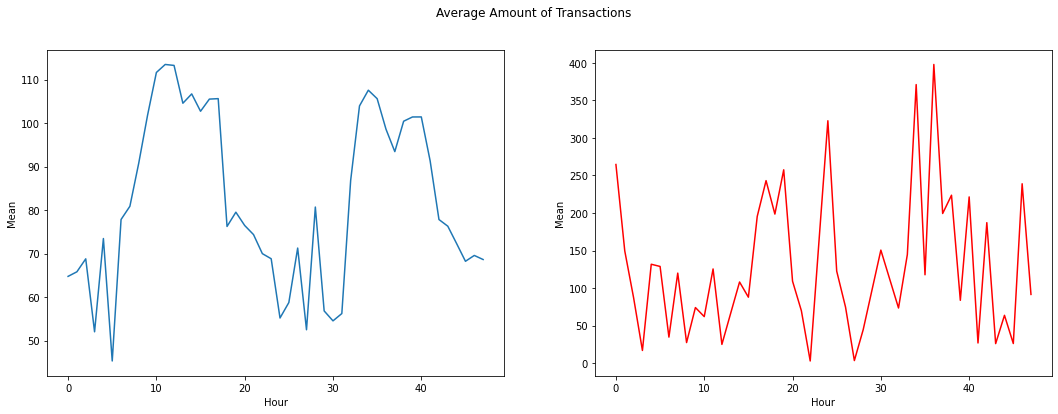

In [22]:
# Plot Total  Avg  Amount Vs Hour : For Normal and Fraud Transactions 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=df.loc[df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show();



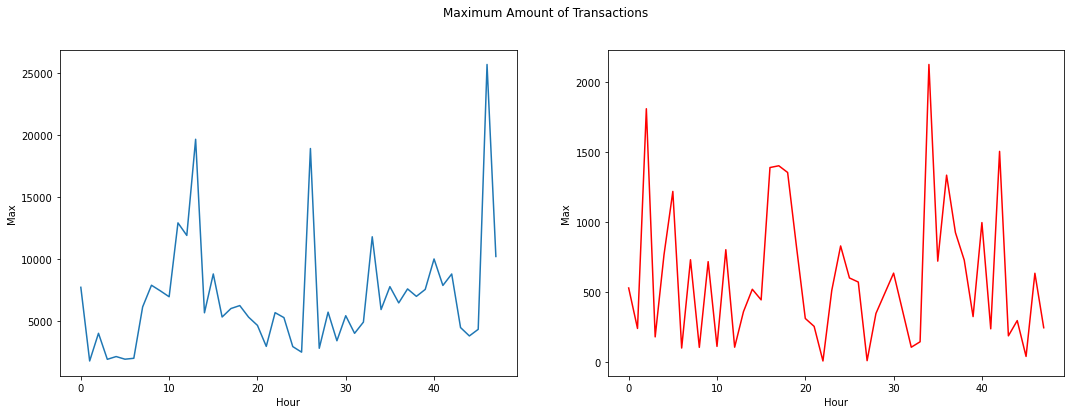

In [23]:
# Plot Max Amt of Transactions vs Hour for good Transactions Vs Fraud ones 

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=df.loc[df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show();



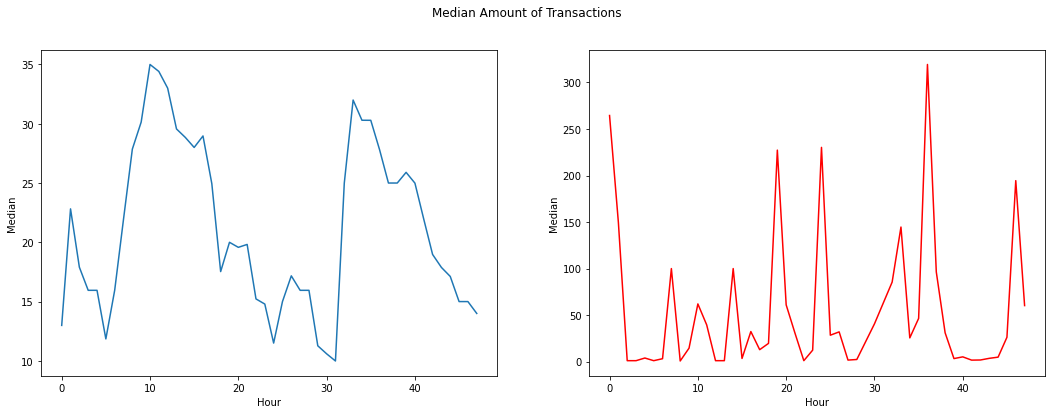

In [24]:
# Plot Median Amt of Transactions vs Hour  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=df.loc[df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show();

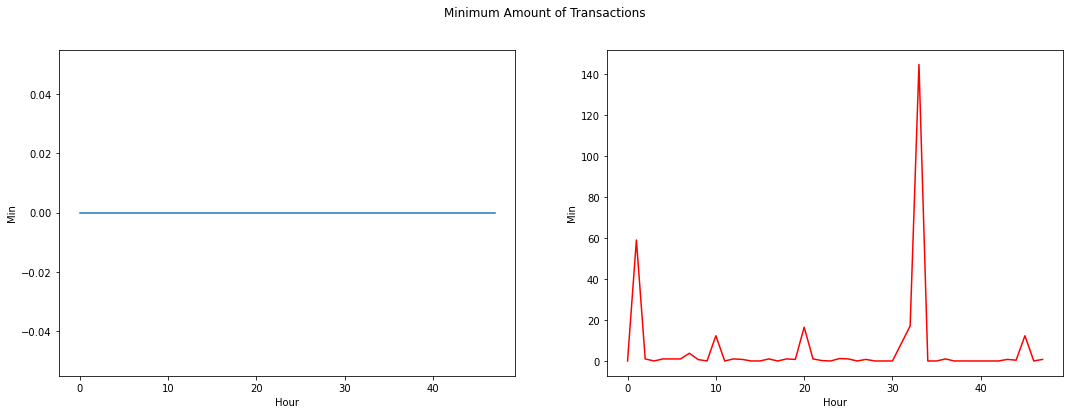

In [25]:
# Plot Minimum Amt of Transactions vs Hour  

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=df.loc[df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=df.loc[df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show();

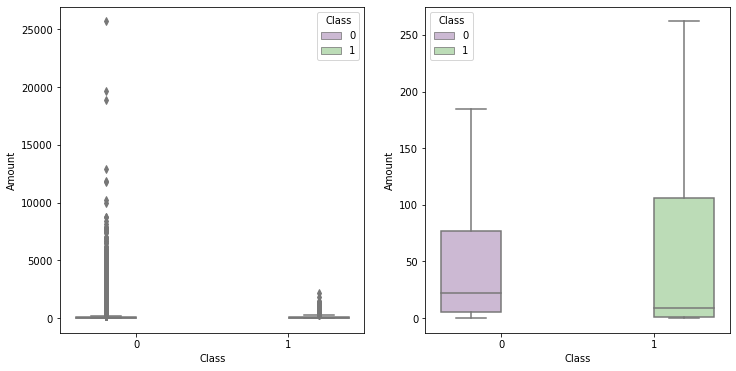

In [26]:
# Box plots on Amount Vs class

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=data, palette="PRGn",showfliers=False)
plt.show();


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:283: UserWarning:

Data must have variance to compute a kernel density estimate.



<Figure size 432x288 with 0 Axes>

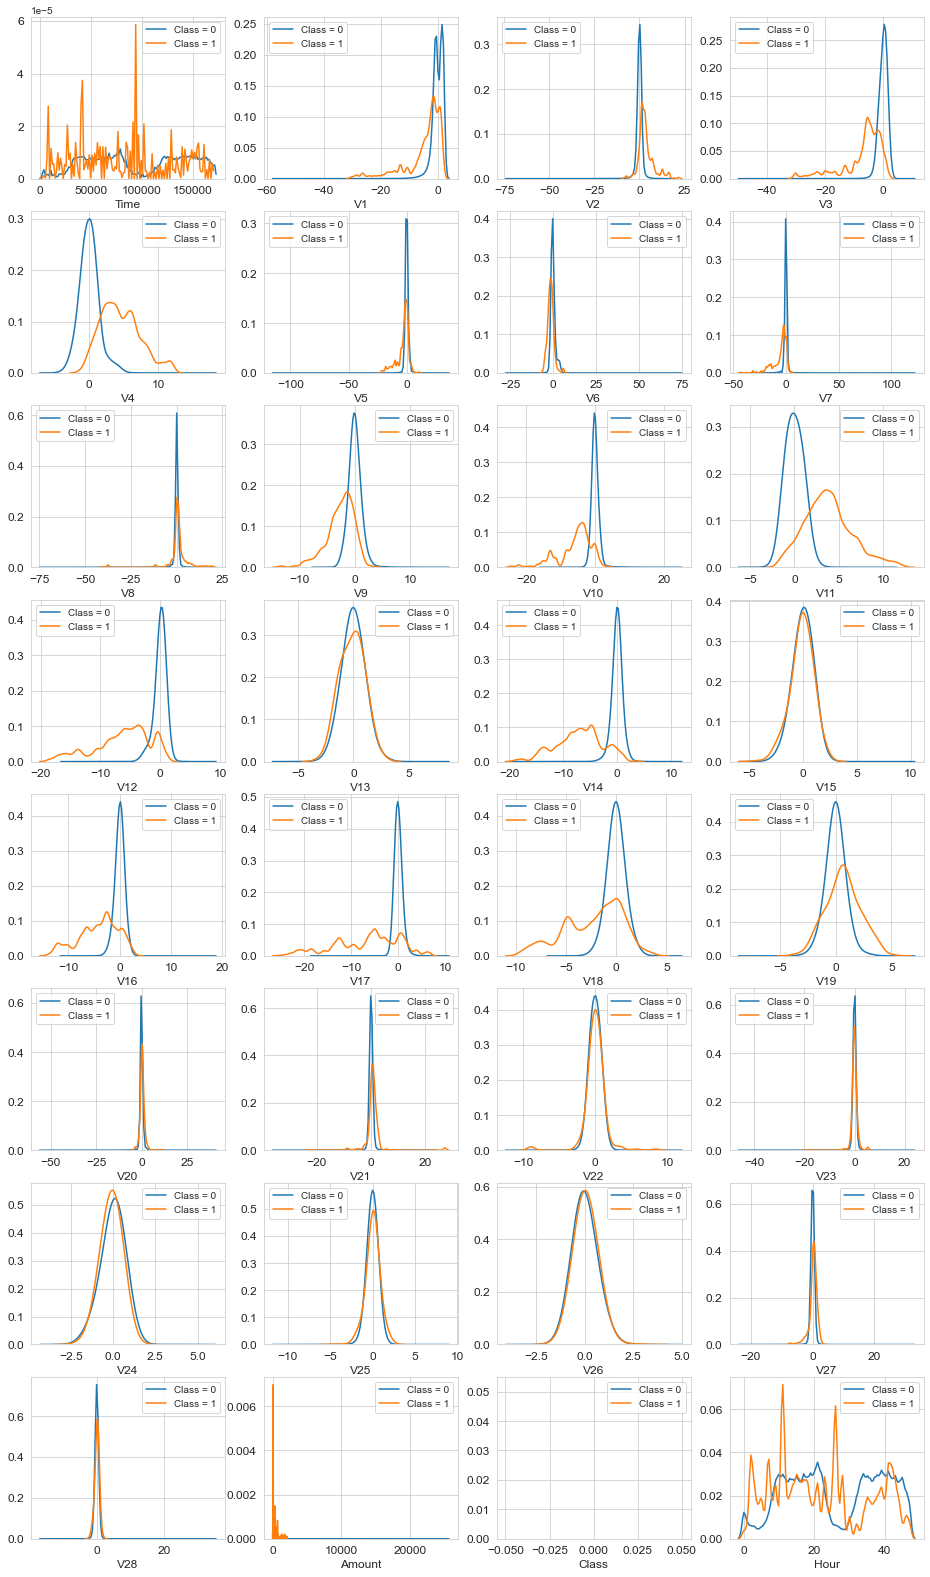

In [27]:
var = data.columns.values

i = 0
t0 = data.loc[data['Class'] == 0]
t1 = data.loc[data['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

**Obeservation**.  V4 and V11 have a clear separation of classes 

### Checking Separation of classes with TSNA Plot 

(20000, 30) (20000, 1)
TSNE done in 86.256s.
(20000, 3)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



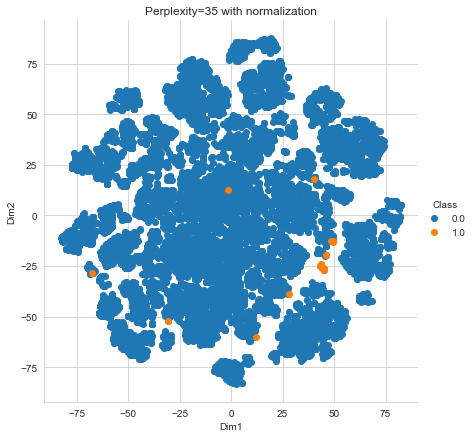

In [37]:
from sklearn.manifold import TSNE
from time import time

from sklearn.preprocessing import StandardScaler

sample_features = data.sample(20000)
# sample_features = df
sample_class = sample_features.Class
sample_class = sample_class[:,np.newaxis]
sample_features = sample_features.drop('Class',axis=1)
scr = StandardScaler()
sample_features = scr.fit_transform(sample_features)
print(sample_features.shape,sample_class.shape)
model = TSNE(n_components=2,random_state=0,perplexity=35)
# print(sample_features,sample_class)

t0 = time()
embedded_data = model.fit_transform(sample_features)
print("TSNE done in %0.3fs." % (time() - t0)) 

final_data = np.concatenate((embedded_data,sample_class),axis=1)
print(final_data.shape)
newdf = pd.DataFrame(data=final_data,columns=["Dim1","Dim2","Class"])

sns.FacetGrid(newdf,hue="Class",size=6).map(plt.scatter,"Dim1","Dim2").add_legend()
plt.title("Perplexity=35 with normalization")
plt.show()